## Deliverable 2. Create a Customer Travel Destinations Map.

In [12]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
import numpy as np
import os
import sys
from config import g_key
gmaps.configure(api_key=g_key)

In [13]:
# 1. Import the WeatherPy_database.csv file. 
city_data_df = pd.read_csv("../Weather_Database/WeatherPy_Database.csv")
city_data_df.head()

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Cape Town,ZA,-33.9258,18.4232,66.11,65,75,3.00,broken clouds
1,1,Paamiut,GL,61.9940,-49.6678,24.69,78,88,9.51,overcast clouds
2,2,Bouca,CF,6.5105,18.2733,78.01,70,95,3.47,overcast clouds
3,3,Matiari,PK,25.5961,68.4467,84.20,16,99,8.81,overcast clouds
4,4,Padina,RS,45.1181,20.7272,59.77,94,100,8.75,moderate rain


In [14]:
# 2. Prompt the user to enter minimum and maximum temperature criteria 
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [15]:
# 3. Filter the city_data_df DataFrame using the input statements to create a new DataFrame using the loc method.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
2,2,Bouca,CF,6.5105,18.2733,78.01,70,95,3.47,overcast clouds
3,3,Matiari,PK,25.5961,68.4467,84.20,16,99,8.81,overcast clouds
6,6,Taoudenni,ML,22.6783,-3.9836,76.24,21,98,6.20,overcast clouds
14,14,Waingapu,ID,-9.6567,120.2641,88.50,63,100,9.93,overcast clouds
21,21,Bilma,NE,18.6853,12.9164,80.56,15,1,6.82,clear sky
22,22,Faanui,PF,-16.4833,-151.7500,79.11,76,26,12.66,light rain
26,26,Tautira,PF,-17.7333,-149.1500,78.82,76,50,11.95,light rain
29,29,Kahului,US,20.8947,-156.4700,77.85,83,1,16.11,clear sky
32,32,Saint-Pierre,RE,-21.3393,55.4781,83.57,66,0,8.05,clear sky
39,39,Bambous Virieux,MU,-20.3428,57.7575,82.65,65,40,10.36,scattered clouds


In [16]:
# 4a. Determine if there are any empty rows.
preferred_cities_df.count()

City_ID                212
City                   212
Country                210
Lat                    212
Lng                    212
Max Temp               212
Humidity               212
Cloudiness             212
Wind Speed             212
Current Description    212
dtype: int64

In [17]:
# 4b. Drop any empty rows and create a new DataFrame that doesn’t have empty rows.
clean_df = preferred_cities_df.dropna()
clean_df.count()

City_ID                210
City                   210
Country                210
Lat                    210
Lng                    210
Max Temp               210
Humidity               210
Cloudiness             210
Wind Speed             210
Current Description    210
dtype: int64

In [18]:
# 5a. Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = clean_df[["City", "Country", "Max Temp", "Current Description", "Lat", "Lng"]].copy()

# 5b. Create a new column "Hotel Name"
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
2,Bouca,CF,78.01,overcast clouds,6.5105,18.2733,
3,Matiari,PK,84.20,overcast clouds,25.5961,68.4467,
6,Taoudenni,ML,76.24,overcast clouds,22.6783,-3.9836,
14,Waingapu,ID,88.50,overcast clouds,-9.6567,120.2641,
21,Bilma,NE,80.56,clear sky,18.6853,12.9164,
22,Faanui,PF,79.11,light rain,-16.4833,-151.7500,
26,Tautira,PF,78.82,light rain,-17.7333,-149.1500,
29,Kahului,US,77.85,clear sky,20.8947,-156.4700,
32,Saint-Pierre,RE,83.57,clear sky,-21.3393,55.4781,
39,Bambous Virieux,MU,82.65,scattered clouds,-20.3428,57.7575,


In [19]:
# 6a. Set parameters to search for hotels with 5000 meters.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# 6b. Iterate through the hotel DataFrame.
for index, row in hotel_df.iterrows():
    # 6c. Get latitude and longitude from DataFrame

    lat = row["Lat"]
    lng = row["Lng"]
    params["location"] = f"{lat},{lng}"
    # 6d. Set up the base URL for the Google Directions API to get JSON data.
    
    base_url ="https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # 6e. Make request and retrieve the JSON data from the search. 
   
    hotels = requests.get(base_url, params=params).json()

    # 6f. Get the first hotel from the results and store the name, if a hotel isn't found skip the city.
    
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [20]:
hotel_df['Hotel Name'].replace('', np.nan, inplace=True)

In [21]:
# 7. Drop the rows where there is no Hotel Name.
clean_hotel_df = hotel_df.dropna()

In [22]:
clean_hotel_df.head(10)

,City,Country,Max Temp,Current Description,Lat,Lng,Hotel Name
3,Matiari,PK,84.20,overcast clouds,25.5961,68.4467,Zawar Khadim Hussain HOUES
14,Waingapu,ID,88.50,overcast clouds,-9.6567,120.2641,Pondok Wisata Elim
21,Bilma,NE,80.56,clear sky,18.6853,12.9164,Expeditions Ténére voyages
22,Faanui,PF,79.11,light rain,-16.4833,-151.7500,Bora-Bora Pearl Beach Resort & Spa
26,Tautira,PF,78.82,light rain,-17.7333,-149.1500,Pension Oaoa
29,Kahului,US,77.85,clear sky,20.8947,-156.4700,Maui Seaside Hotel
32,Saint-Pierre,RE,83.57,clear sky,-21.3393,55.4781,Lindsey Hôtel
39,Bambous Virieux,MU,82.65,scattered clouds,-20.3428,57.7575,Casa Tia Villa
43,Vaini,TO,77.16,broken clouds,-21.2000,-175.2000,Keleti Beach Resort
45,Tual,ID,84.38,broken clouds,-5.6667,132.7500,Grand Vilia Hotel


In [23]:
# 8a. Create the output File (CSV)
output_data_file = "WeatherPy_vacation.csv"
# 8b. Export the City_Data into a csv
clean_hotel_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# 9. Using the template add city name, the country code, the weather description and maximum temperature for the city.
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>

"""

# 10a. Get the data from each row and add it to the formatting template and store the data in a list.
hotel_info = [info_box_template.format(**row) for index, row in clean_hotel_df.iterrows()]

# 10b. Get the latitude and longitude from each row and store in a new DataFrame.
locations = clean_hotel_df[["Lat", "Lng"]]

In [25]:
# 11a. Add a marker layer for each city to the map. 
locations = clean_hotel_df[["Lat", "Lng"]]
max_temp = clean_hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# 11b.
   #Display the figure
print(fig)

Figure(layout=FigureLayout(height='420px'))


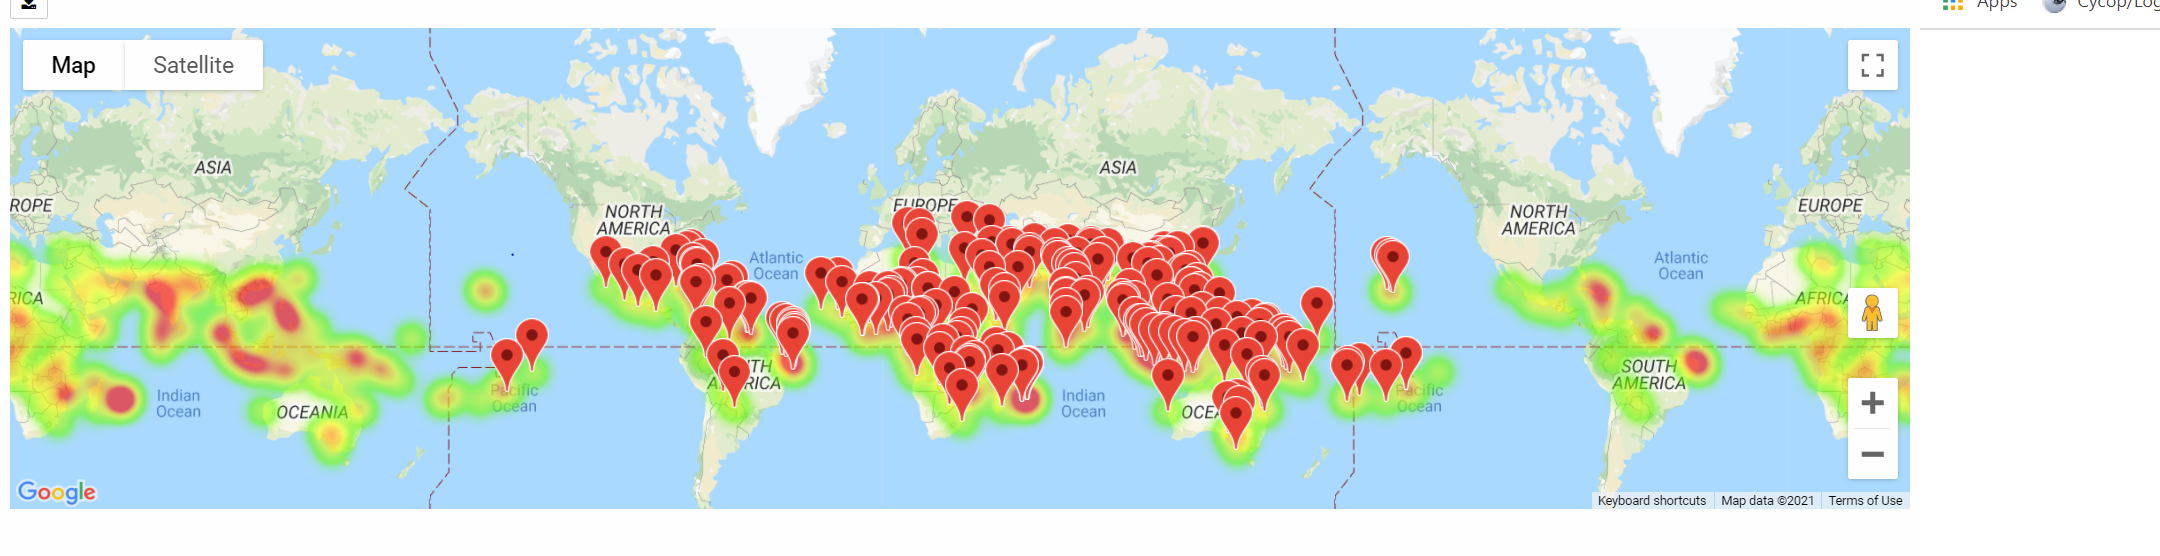